In [1]:
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt
# importamos deepcopy para copiar objetos
from copy import deepcopy

In [16]:
def detectar_circulos(images):
    # Convertir la imagen a escala de grises
    images_circulos = []
    for img in images:
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        # Detectar círculos utilizando la transformada de Hough para círculos
        circles = cv2.HoughCircles(
            blurred,
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=50,
            param1=50,
            param2=30,
            minRadius=10,
            maxRadius=100
        )

        # Dibujar los círculos en la imagen original
        img_circulos = img.copy()
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                cv2.circle(img_circulos, (i[0], i[1]), i[2], (0, 255, 0), 2)

        images_circulos.append(img_circulos)

    return images_circulos

In [13]:
def load_images(filenames):
    return [imageio.imread(filename) for filename in filenames]

filenames = [f'calibracion/img{i}.jpg' for i in range(1,24)]
images = load_images(filenames)

C:\Users\lucia\AppData\Local\Temp\ipykernel_40584\807623881.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


In [17]:
def show_circles(images):
    fig, ax = plt.subplots(4, 6, figsize=(15, 10))
    for i, img in enumerate(images):
        ax[i//6, i%6].imshow(img)
        ax[i//6, i%6].axis('off')
    plt.show()

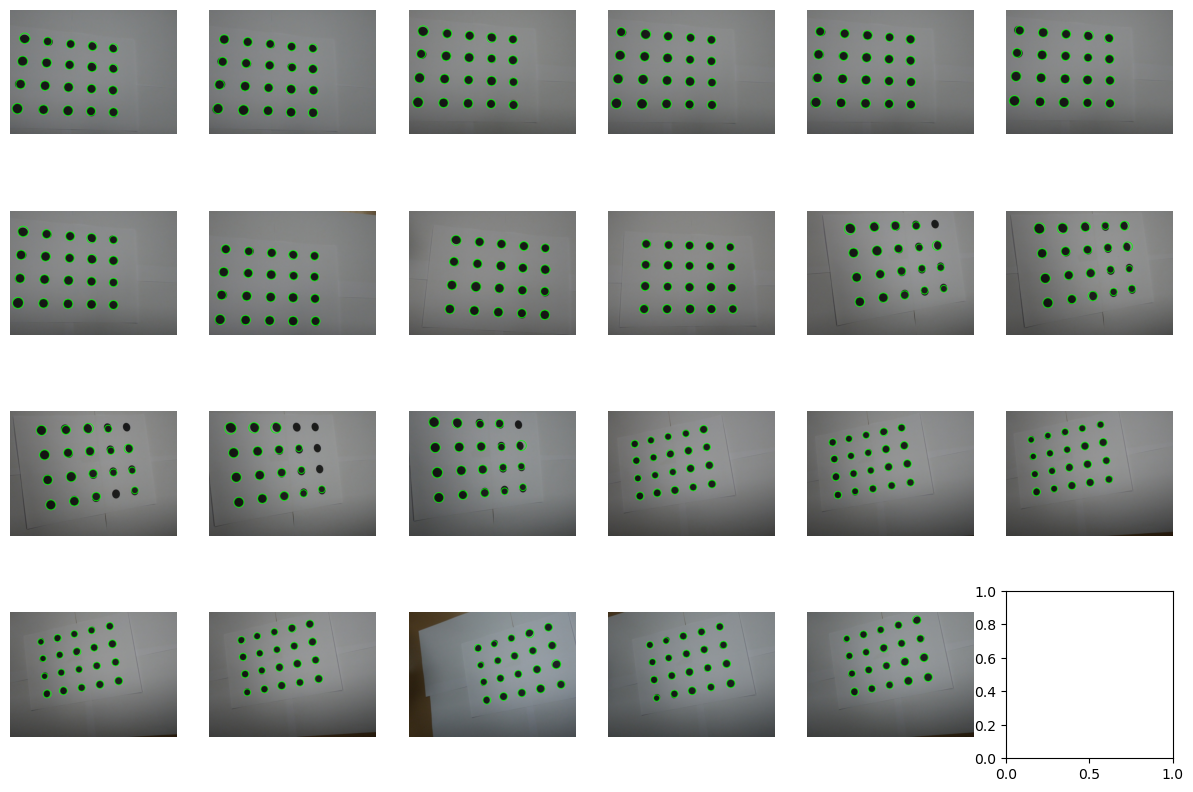

In [18]:
images_circulos = detectar_circulos(images)
show_circles(images_circulos)